In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geobr
import math
import itertools
from shapely.geometry import Point
import geopandas as gpd
import h5py


In [2]:
plt.style.use("seaborn-v0_8-whitegrid")
plt.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"

In [3]:
file_path = './1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5'
with h5py.File(file_path, 'r') as hdf:
    keys = list(hdf.keys())
    print(keys)

['table_data', 'table_info']


In [4]:
spatial_resolution = 0.1

In [5]:
df_info = pd.read_hdf(file_path, key='table_info')
df_info

,name_station,gauge_code,city,state,responsible,source,state_abbreviation,lat,long
0,SANTA RITA DO PARDO | S716,S716,SANTA RITA DO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-21.305889,-52.820375
1,RIBAS DO RIO PARDO | S715,S715,RIBAS DO RIO PARDO,MATO GROSSO DO SUL,INMET,INMET,MS,-20.466694,-53.763028
2,PEDRO GOMES | S714,S714,PEDRO GOMES,MATO GROSSO DO SUL,INMET,INMET,MS,-18.072778,-54.548889
3,NOVA ALVORADA DO SUL | S712,S712,NOVA ALVORADA DO SUL,MATO GROSSO DO SUL,INMET,INMET,MS,-21.450972,-54.341972
4,LAGUNA CARAPA | S711,S711,LAGUNA CARAPA,MATO GROSSO DO SUL,INMET,INMET,MS,-22.575389,-55.160333
...,...,...,...,...,...,...,...,...,...
17125,MARUDA,00047005,MARAPANIM,PARÁ,ANA,HIDROWEB,PA,-0.633600,-47.658300
17126,PRIMAVERA,00047004,PRIMAVERA,PARÁ,ANA,HIDROWEB,PA,-0.929400,-47.099400
17127,CURUÇA,00047003,CURUÇA,PARÁ,ANA,HIDROWEB,PA,-0.737500,-47.853600
17128,SALINÓPOLIS,00047002,SALINÓPOLIS,PARÁ,ANA,HIDROWEB,PA,-0.623100,-47.353600


In [6]:
# Assuming df_info is your DataFrame containing the specified columns

# Get the maximum and minimum values from 'lat' and 'long'
max_lat = df_info['lat'].max()
min_lat = df_info['lat'].min()
max_long = df_info['long'].max()
min_long = df_info['long'].min()

# Display the results
print(f"Max lat: {max_lat}, Min lat: {min_lat}")
print(f"Max long: {max_long}, Min long: {min_long}")


Max lat: 4.6428, Min lat: -33.74222221
Max long: -32.4167, Min long: -73.6522


In [7]:
# Round up the maximum lat by spatial_resolution
rounded_max_lat = math.ceil(max_lat / spatial_resolution) * spatial_resolution

# Round down the minimum lat by spatial_resolution
rounded_min_lat = math.floor(min_lat / spatial_resolution) * spatial_resolution

# Round the values again
rounded_max_lat = round(rounded_max_lat + 5.00 - spatial_resolution/2, 2)
rounded_min_lat = round(rounded_min_lat - 5.00 - spatial_resolution/2, 2)

# Display the rounded values
print(f"Rounded Max lat: {rounded_max_lat}")
print(f"Rounded Min lat: {rounded_min_lat}")

# Round up the maximum long by spatial_resolution
rounded_max_long = math.ceil(max_long / spatial_resolution) * spatial_resolution

# Round down the minimum long by spatial_resolution
rounded_min_long = math.floor(min_long / spatial_resolution) * spatial_resolution

# Round the values again
rounded_max_long = round(rounded_max_long + 5.00 - spatial_resolution/2, 2) # centro do pixel
rounded_min_long = round(rounded_min_long - 5.00 - spatial_resolution/2, 2)

# Display the rounded values
print(f"Rounded Max long: {rounded_max_long}")
print(f"Rounded Min long: {rounded_min_long}")

Rounded Max lat: 9.65
Rounded Min lat: -38.85
Rounded Max long: -27.45
Rounded Min long: -78.75


In [8]:
# Generate lists of lats and longs within the specified ranges
# Initialize an empty list to store the lats
lats = []

# Start with the minimum lat
current_lat = rounded_min_lat

# Increment by spatial_resolution until reaching the maximum lat
while current_lat <= rounded_max_lat:
    lats.append(round(current_lat, 2))  # Round to 2 decimal places
    current_lat += spatial_resolution
    
longs = []

# Start with the minimum long
current_lon = rounded_min_long

# Increment by spatial_resolution until reaching the maximum long
while current_lon <= rounded_max_long:
    longs.append(round(current_lon, 2))  # Round to 2 decimal places
    current_lon += spatial_resolution
    
# Create all possible combinations of lats and longs using itertools
all_combinations = list(itertools.product(lats, longs))

# Create a DataFrame from the combinations
df_coords = pd.DataFrame(all_combinations, columns=['lat', 'long'])
df_coords['lat'] = df_coords['lat'].astype(float).round(2)
df_coords['long'] = df_coords['long'].astype(float).round(2)
df_coords.drop_duplicates(inplace=True, ignore_index=True)
df_coords.to_excel('.\\5 - Results\\df_coords.xlsx', index=False, sheet_name='df_coords', engine='openpyxl')
df_coords

,lat,long
0,-38.85,-78.75
1,-38.85,-78.65
2,-38.85,-78.55
3,-38.85,-78.45
4,-38.85,-78.35
...,...,...
249285,9.55,-27.85
249286,9.55,-27.75
249287,9.55,-27.65
249288,9.55,-27.55


In [9]:
br_map = geobr.read_state(year=2020)
br_map.crs = "EPSG:4326" # WGS 84 (World Geodetic System 1984)
br_map['name_state'] = br_map['name_state'].apply(str.upper)
br_map = br_map.sort_values(by = ['name_state'])
br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)
br_map.head(5)

C:\Users\linde\AppData\Local\Temp\ipykernel_8724\507154357.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  br_map['name_state'].replace({'AMAZÔNAS': 'AMAZONAS'}, inplace = True)


,code_state,abbrev_state,name_state,code_region,name_region,geometry
1,12.0,AC,ACRE,1.0,Norte,"MULTIPOLYGON (((-71.07772 -9.82774, -71.07817 ..."
13,27.0,AL,ALAGOAS,2.0,Nordeste,"MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ..."
5,16.0,AP,AMAPÁ,1.0,Norte,"MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2..."
2,13.0,AM,AMAZONAS,1.0,Norte,"MULTIPOLYGON (((-69.83766 -3.68659, -69.82555 ..."
15,29.0,BA,BAHIA,2.0,Nordeste,"MULTIPOLYGON (((-38.69616 -17.97901, -38.69618..."


In [10]:
def check_containment(row):
    point = Point(row['long'], row['lat'])  # Create Point object
    for idx, geometry in br_map['geometry'].items():
        if geometry.contains(point):
            return True  # If any geometry contains the point, return True
    return False  # If no geometry contains the point, return False

# Apply the function to each row and create a new column 'Inside_Boundary'
df_coords['Inside_Boundary'] = df_coords.apply(check_containment, axis=1)
df_coords = df_coords[df_coords['Inside_Boundary'] == True]
df_coords = df_coords.reset_index(drop = True)
df_coords

,lat,long,Inside_Boundary
0,-33.65,-53.45,True
1,-33.65,-53.35,True
2,-33.65,-53.25,True
3,-33.55,-53.45,True
4,-33.55,-53.35,True
...,...,...,...
70890,5.15,-60.45,True
70891,5.15,-60.35,True
70892,5.15,-60.25,True
70893,5.15,-60.15,True


In [11]:
lat_list = df_coords['lat'].values.tolist()
lon_list = df_coords['long'].values.tolist()
lat_list_border = []
lon_list_border = []

In [12]:
for i in range (len(lat_list[:])):
    lat = lat_list[i]
    lon = lon_list[i]
    lat_list_border.append(round(lat_list[i]+spatial_resolution, 2))
    lat_list_border.append(round(lat_list[i]+spatial_resolution, 2))
    lat_list_border.append(round(lat_list[i]-spatial_resolution, 2))
    lat_list_border.append(round(lat_list[i]-spatial_resolution, 2))

    lat_list_border.append(round(lat_list[i]+spatial_resolution, 2))
    lat_list_border.append(round(lat_list[i]-spatial_resolution, 2))

    lat_list_border.append(round(lat_list[i], 2))
    lat_list_border.append(round(lat_list[i], 2))

    lon_list_border.append(round(lon_list[i]+spatial_resolution, 2))
    lon_list_border.append(round(lon_list[i]-spatial_resolution, 2))
    lon_list_border.append(round(lon_list[i]+spatial_resolution, 2))
    lon_list_border.append(round(lon_list[i]-spatial_resolution, 2))

    lon_list_border.append(round(lon_list[i], 2))
    lon_list_border.append(round(lon_list[i], 2))

    lon_list_border.append(round(lon_list[i]+spatial_resolution, 2))
    lon_list_border.append(round(lon_list[i]-spatial_resolution, 2))


print(lat_list[0:1])
print(lon_list[0:1])
print(lat_list_border[0:8])
print(lon_list_border[0:8])

[-33.65]
[-53.45]
[-33.55, -33.55, -33.75, -33.75, -33.55, -33.75, -33.65, -33.65]
[-53.35, -53.55, -53.35, -53.55, -53.45, -53.45, -53.35, -53.55]


In [13]:
lat_coords = lat_list + lat_list_border
lon_coords = lon_list + lon_list_border
len(lat_coords)

638055

In [14]:
df_coords_border = pd.DataFrame({'lat': lat_coords, 'long': lon_coords})
df_coords_border = df_coords_border.drop_duplicates(ignore_index=True)
df_coords_border['lat'] = df_coords_border['lat'].astype(float).round(2)
df_coords_border['long'] = df_coords_border['long'].astype(float).round(2)
df_coords_border = df_coords_border.drop_duplicates(ignore_index=True)
df_coords_border


# Final Estimate
# At the equator: ~77,400 cells

# Considering latitude variation: ~71,100 cells

,lat,long
0,-33.65,-53.45
1,-33.65,-53.35
2,-33.65,-53.25
3,-33.55,-53.45
4,-33.55,-53.35
...,...,...
73106,5.25,-60.15
73107,5.25,-60.05
73108,5.35,-60.15
73109,5.35,-60.35


In [15]:
df_coords_border.dtypes

lat     float64
long    float64
dtype: object

In [16]:
geometry = gpd.points_from_xy(df_coords_border['long'], df_coords_border['lat'])
df_coords_border_geo = gpd.GeoDataFrame(df_coords_border, geometry=geometry, crs="EPSG:4326")
df_coords_border_geo.dropna(inplace=True)
df_coords_border_geo

,lat,long,geometry
0,-33.65,-53.45,POINT (-53.45 -33.65)
1,-33.65,-53.35,POINT (-53.35 -33.65)
2,-33.65,-53.25,POINT (-53.25 -33.65)
3,-33.55,-53.45,POINT (-53.45 -33.55)
4,-33.55,-53.35,POINT (-53.35 -33.55)
...,...,...,...
73106,5.25,-60.15,POINT (-60.15 5.25)
73107,5.25,-60.05,POINT (-60.05 5.25)
73108,5.35,-60.15,POINT (-60.15 5.35)
73109,5.35,-60.35,POINT (-60.35 5.35)


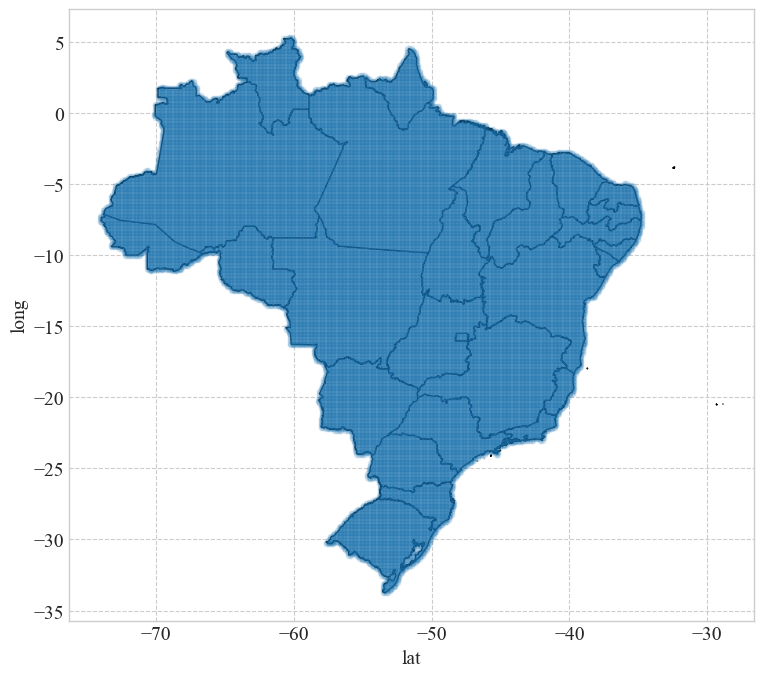

In [17]:
plt.rcParams['font.size'] = '14'
plt.rcParams["font.family"] = "Times New Roman"
tnr_title = {'fontname':'Times New Roman', "fontweight" :"bold", 'fontsize': 16}

fig, ax = plt.subplots(figsize = (10, 7))
br_map.plot(ax = ax, color = 'w')
br_map.plot(ax = ax, color = 'white', edgecolor = 'black')
df_coords_border_geo.plot(ax = ax
                    , legend = False
                    , alpha = 0.1
                    , markersize = 10
                   )
# ax.set_title("New Grid", tnr_title)

# ax.set_ylim([-35, 7])
# ax.set_xlim([-75, -33])
ax.set_xlabel('lat')
ax.set_ylabel('long')
ax.grid(ls='--')
plt.tight_layout()
plt.savefig('figures/coordinates_test.tiff', format='tiff', dpi=300, transparent=False, bbox_inches=None)
plt.show()
plt.close()

In [18]:
df_coords_border.to_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', 'table_grid', mode = 'r+', complevel = 9, encoding="utf-8")
df_coords_border

C:\Users\linde\AppData\Local\Temp\ipykernel_8724\1976700495.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_hdf except for the argument 'path_or_buf' will be keyword-only.
  df_coords_border.to_hdf('./1 - Organized data gauge/BRAZIL/DATASETS/BRAZIL_DAILY_1961_2024_QC.h5', 'table_grid', mode = 'r+', complevel = 9, encoding="utf-8")


,lat,long
0,-33.65,-53.45
1,-33.65,-53.35
2,-33.65,-53.25
3,-33.55,-53.45
4,-33.55,-53.35
...,...,...
73106,5.25,-60.15
73107,5.25,-60.05
73108,5.35,-60.15
73109,5.35,-60.35
